# セル平面上の移動（障害物あり）

## ライブラリのインストール

In [1]:
#!pip install numpy
#!pip install matplotlib

## ライブラリのインポート

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

## 定数の設定

In [3]:
ROWS = 10 #格子の縦の数
COLS = 20 #格子の横の数
NUM_AGENT = 20#エージェントの数
KINDS_PARTICLE = 4


## 対戦と戦略の変更

In [4]:
def Move(F, A):
    a = list(range(NUM_AGENT))
    np.random.shuffle(a)
    for i in a:
        A[i].Move(F)

## 表示のための設定

In [5]:
def MakeField(F):
#    print(F)
    px = []
    py = []
    pc = []
    #カラー表示の場合
    cmap = ['w', 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'lightblue', 'orange','lightgreen','lightgrey', 'gold']
    #白黒表示の場合
#    cmap = ['k','grey', 'lightgrey']
#    cmap = [[1-i/(NUM_ROLE-1),1-i/(NUM_ROLE-1),1-i/(NUM_ROLE-1)] for i in range(NUM_ROLE)]
    for i in range(ROWS):
        for j in range(COLS):
#            print(i,j)
            if F[i,j]!=0:
                px.append(j)
                py.append(i)
                pc.append(cmap[F[i,j]])
    return px,py,pc


## エージェントクラス

In [6]:
class Agent():
    def __init__(self, n):
        self.pos = np.array([np.random.randint(COLS),np.random.randint(ROWS)])
        self.role = np.random.randint(2)
        self.vel = np.array([1,0]) if self.role==0 else np.array([-1,0])
    def Move(self, F):
        F[self.pos[1],self.pos[0]] = 0
        tmp_pos = self.pos+self.vel
        if self.Check(F,tmp_pos)==True:
            self.pos = tmp_pos
        else:
            tmp_pos = self.pos+[0,np.random.randint(-1,1)]
            if self.Check(F,tmp_pos)==True:
                self.pos = tmp_pos
        F[self.pos[1],self.pos[0]] = self.role+1
    def Check(self,F,p):#移動できるかのチェック用
        if p[0]<0:p[0]=COLS-1
        if p[0]>COLS-1:p[0]=0
        if p[1]<0:p[1]=ROWS-1
        if p[1]>ROWS-1:p[1]=0
        if F[p[1],p[0]]==0:return True
        return False

## 実行と表示

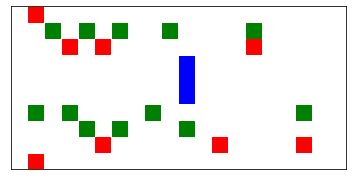

In [7]:
np.random.seed( 0 )
F = np.zeros((ROWS,COLS),dtype=int)
#障害物の設定
F[ROWS//2,COLS//2] = 3
F[ROWS//2-1,COLS//2] = 3
F[ROWS//2+1,COLS//2] = 3

A = [Agent(i) for i in range(NUM_AGENT)]

figsize =  (6,6*ROWS/COLS) if ROWS<COLS else (6*COLS/ROWS,6)
makersize = 300/COLS if ROWS<COLS else 300/ROWS
makersize *=makersize
fig, ax = plt.subplots(1, 1, figsize=figsize)
    
def update(k):
    px,py,pc = MakeField(F)
    ax.cla()
    ax.set_xlim(-0.5,COLS-0.5)
    ax.set_ylim(-0.5,ROWS-0.5)
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    ax.scatter(px,py,c=pc,marker="s", s=makersize)
    Move(F,A)
    
ani = animation.FuncAnimation(fig, update, interval = 100, frames = 200, repeat=False)
HTML(ani.to_jshtml())#jupyter notebookに表示

## Anacondaを利用した場合gifアニメーションが生成される

In [8]:
pip install Pillow 

Note: you may need to restart the kernel to use updated packages.


In [9]:
ani.save("walk_cell_obst.gif")#gifアニメーションファイルの保存

MovieWriter ffmpeg unavailable; using Pillow instead.
